In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')
import pickle

In [48]:
import pandas as pd
df = pd.read_csv("car data.csv")

In [49]:
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [50]:
#selling_price is target variable
#fuel, seller_type, transmission, owner are all categorical variable

In [51]:
#Checking number of rows and columns
df.shape

(301, 9)

In [52]:
#using unique to see all the values present in the categorical column

print(df['Seller_Type'].unique()) 
print(df['Owner'].unique()) 
print(df['Transmission'].unique()) 
print(df['Fuel_Type'].unique()) 

['Dealer' 'Individual']
[0 1 3]
['Manual' 'Automatic']
['Petrol' 'Diesel' 'CNG']


In [53]:
#checking missing or null value
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [54]:
#checking stastical details
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [55]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [56]:
#using year feature we will find the number of years car used. Considering the latest year as 2021.
# number of years = 2021 - year
#number of years will be derived column 

final_dataset = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

final_dataset.shape

(301, 8)

In [57]:
final_dataset['Current_Year'] = 2021

In [58]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


In [59]:
final_dataset['No_of_years'] = final_dataset['Current_Year'] - final_dataset['Year']

In [60]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,No_of_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [61]:
#Now the feature 'Year' and 'Current_Year' is not required, because we derived a new feature 'No_of_years'
#So, now we will drop these both the features/column

final_dataset.drop(['Year','Current_Year'], axis=1, inplace= True)

In [62]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [63]:
#Now converting categorical variables into other value(one-hot-encoded)
#here we use get_dummies function of pandas

final_dataset = pd.get_dummies(final_dataset,drop_first= True)

In [64]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [65]:
#here we can see fuel_type has 2 columns, but in main data we were having 3 values, so when these 2 variables are 0,0 then we can say that
#the fuel value is third one.

#Now finding correlation
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
No_of_years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


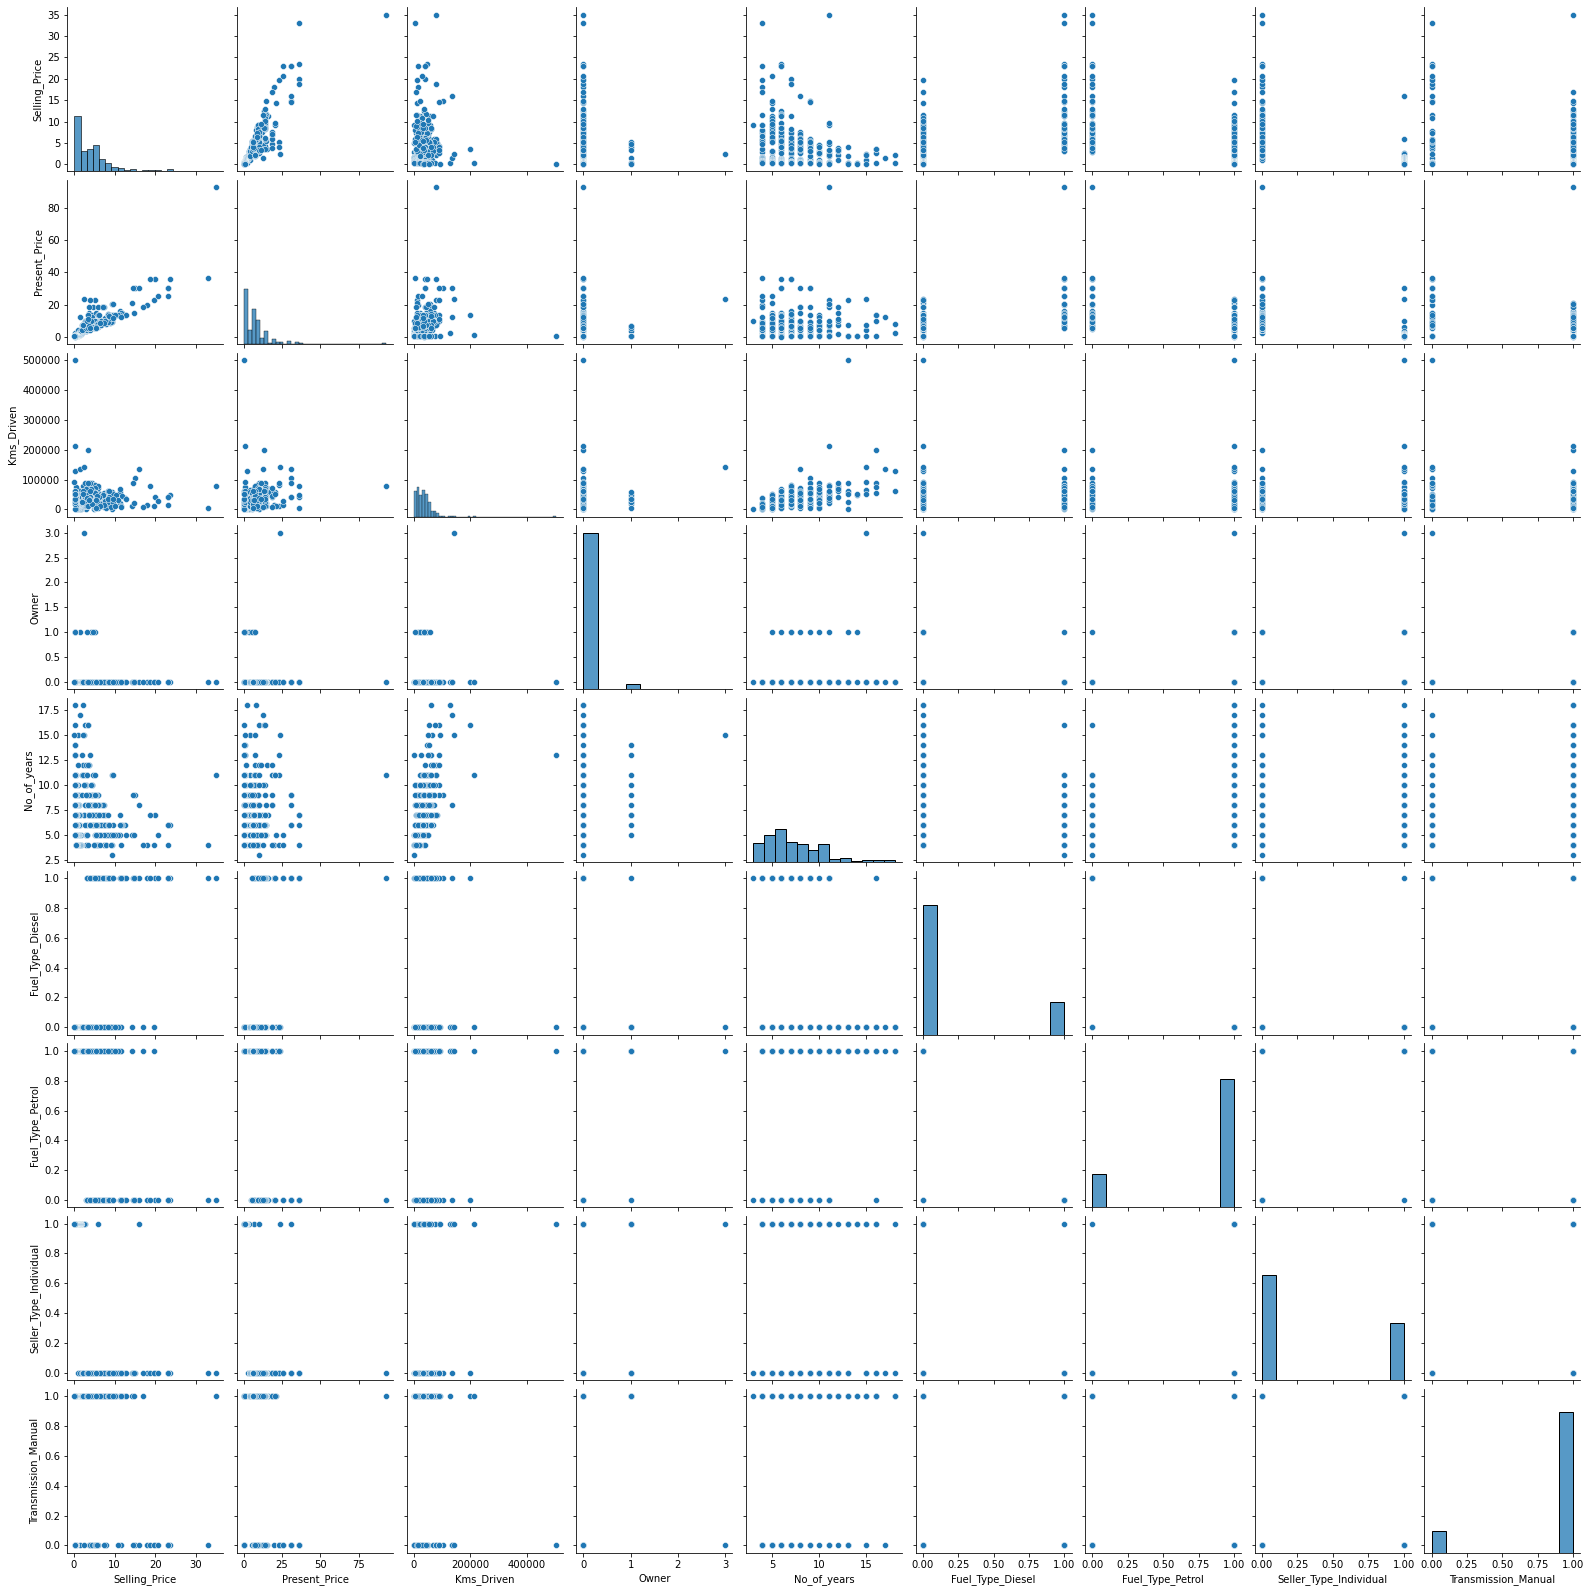

In [66]:
sns.pairplot(final_dataset)

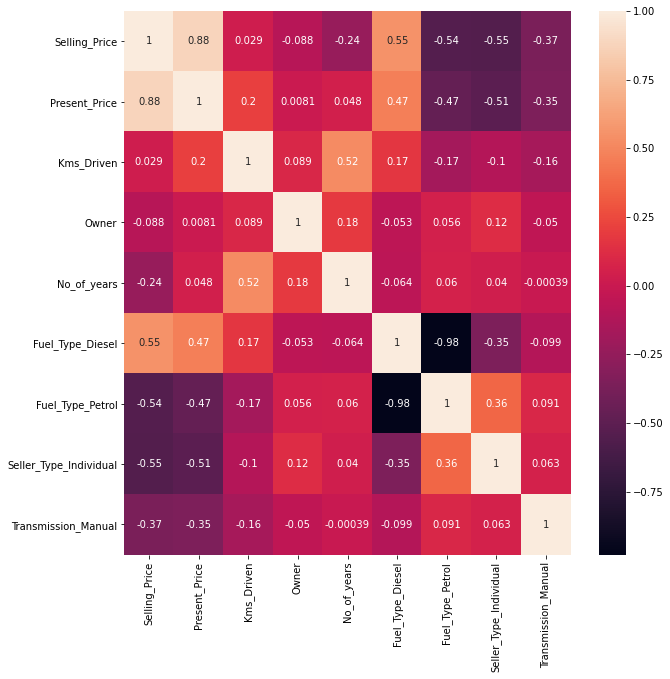

In [67]:
corrmat = final_dataset.corr() #taking correlation in a variable
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g = sns.heatmap(final_dataset[top_corr_features].corr(),annot =True)

In [68]:
#tanking independent and dependent features

X =  final_dataset.iloc[:,1:] #taking 1 because from index 1 we want in this set, as 0 index is dependent variable
y = final_dataset.iloc[:,0]

In [69]:
X.head()

,Present_Price,Kms_Driven,Owner,No_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [70]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [71]:
#feature importance

model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [72]:
print(model.feature_importances_)

[0.38443483 0.04233709 0.00076498 0.0731254  0.22906105 0.00945651
 0.12391159 0.13690854]


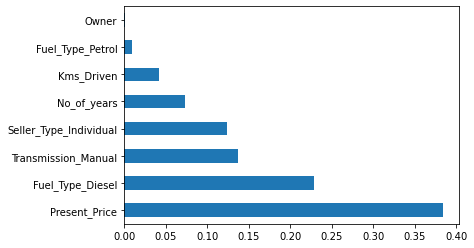

In [73]:
#Present price has high importance
#Plotting for better understanding

feat_importance = pd.Series(model.feature_importances_, index= X.columns)
feat_importance.nlargest(8).plot(kind= 'barh')
plt.show()

In [74]:
#Spliting int train and test data

In [75]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [76]:
print(X_train.shape, X_test.shape)

(240, 8) (61, 8)


In [77]:
print(y_train.shape,y_test.shape)

(240,) (61,)


In [78]:
rf_random = RandomForestRegressor()

In [79]:
#hyperparameters
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30, num=6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [80]:

random_grid = {'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [81]:
#first create the base model to tune
rf = RandomForestRegressor()

In [82]:
#Now applying randomisedSearchCV
rf_random = RandomizedSearchCV(estimator= rf, param_distributions= random_grid, scoring= 'neg_mean_squared_error', n_iter= 10, cv=5, 
                               verbose=2, random_state=42, n_jobs=1)
#verbose is used to display the values

In [83]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [84]:
#Now we will do predictions
predictions= rf_random.predict(X_test)

In [85]:
predictions

array([ 7.76981 ,  0.39394 ,  4.271105,  0.58235 ,  5.294325,  3.32262 ,
        2.8297  ,  6.39079 ,  5.18991 ,  2.9053  ,  5.031765,  6.0062  ,
        7.50594 , 10.41    ,  6.9343  ,  0.54364 ,  5.90728 , 12.03977 ,
        3.59292 ,  7.38333 ,  5.120755,  5.84231 ,  4.138845,  2.97297 ,
        1.09215 ,  1.05435 ,  3.959635,  3.46911 ,  5.332175,  3.80815 ,
        6.87455 ,  0.58159 ,  4.89741 ,  0.82389 ,  5.83385 ,  4.88624 ,
        0.67278 ,  0.3023  ,  0.59437 ,  9.83347 ,  6.73295 ,  1.3224  ,
       19.23946 ,  0.67125 , 10.82182 ,  5.81243 ,  4.397425,  0.82564 ,
        0.52843 ,  5.82269 ,  0.70115 ,  2.52178 ,  4.612775,  5.0609  ,
        3.19565 ,  0.53882 ,  0.72824 ,  3.33852 ,  0.82472 ,  0.4816  ,
       19.84134 ])

<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

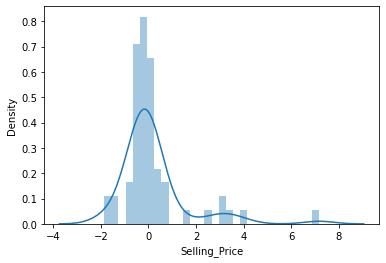

In [86]:
sns.distplot(y_test-predictions)

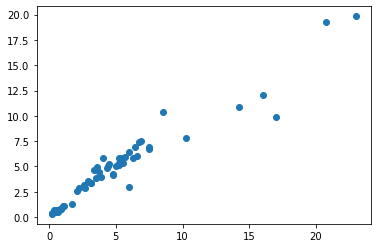

In [87]:
plt.scatter(y_test, predictions)

In [88]:
#sctter plot is mostly linear, so our predictions is pretty good

In [89]:
mae = mean_absolute_error(y_test, predictions)

In [90]:
mae

0.7641728688524607

In [91]:
r2_score(y_test, predictions)

0.9110928313829915

In [92]:
# Creating a pickel file for the classifier
# Creating a pickel file for the classifier
filename = 'Car_Price_ML_Model.pkl'
pickle.dump(rf_random,open(filename,'wb'))
print("Successfull")

Successfull
